In [2]:
import pandas as pd
from pandas import DataFrame
import sklearn as sk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import missingno as msno

In [3]:
dataset=pd.read_csv('Titanic-Dataset.csv')

DATA PREPROCESSING

In [4]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
dataset.shape

(891, 12)

In [6]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
dataset.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

<Axes: ylabel='Age'>

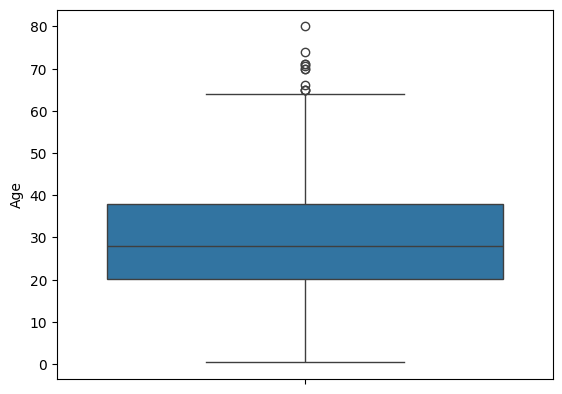

In [9]:
# Outlier detection
sns.boxplot(dataset["Age"])

In [10]:
# Outlier handling
Q1 = dataset["Age"].quantile(0.25)
Q3 =  dataset["Age"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Remove outliers based on the fences in-place
dataset = dataset.drop(dataset[(dataset["Age"] < lower_fence) | (dataset["Age"] > upper_fence)].index)
dataset.shape

(880, 12)

In [13]:
# Number of missing values 
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          681
Embarked         2
dtype: int64

<Axes: >

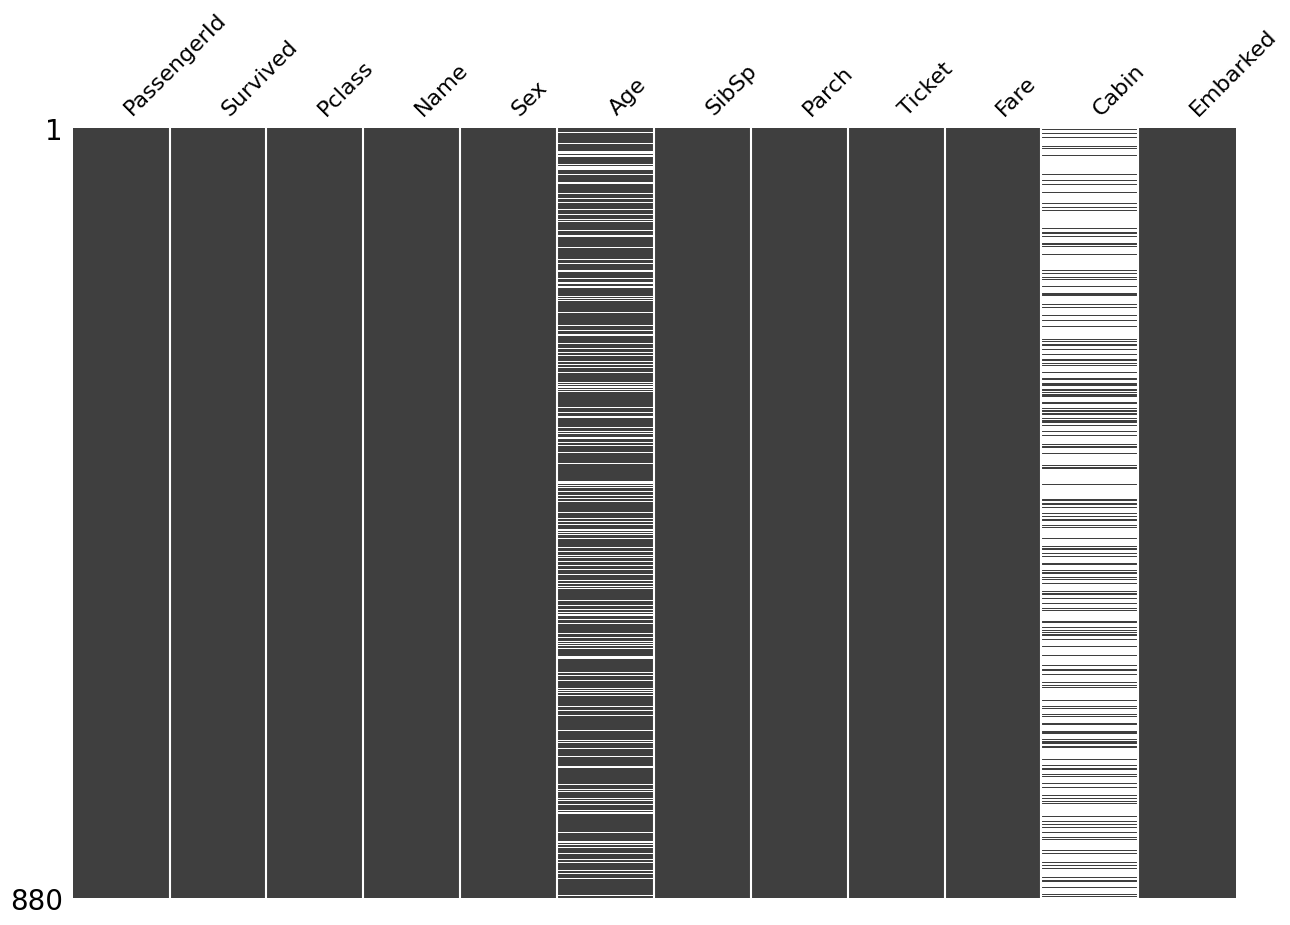

In [14]:
# Missing value plot
msno.matrix(dataset,figsize=(15,10),sparkline=False,p=0)

In [15]:
# Dropping irrelevent attributes
dataset = dataset.drop(['Cabin', 'Ticket'], axis=1)
print(dataset)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [16]:
dataset.shape

(880, 10)

In [17]:
# Replacing missing values
dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)
print(dataset.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Embarked  
0      0   7.2500        S  
1      0  71.2833        C  
2      0   7.9250        S  
3      0  53.1000        S  
4      0   8.0500        S  


C:\Users\javee\AppData\Local\Temp\ipykernel_14924\1340567160.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
C:\Users\javee\AppData\Local\Temp\ipykernel_14924\1340567160.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


<Axes: >

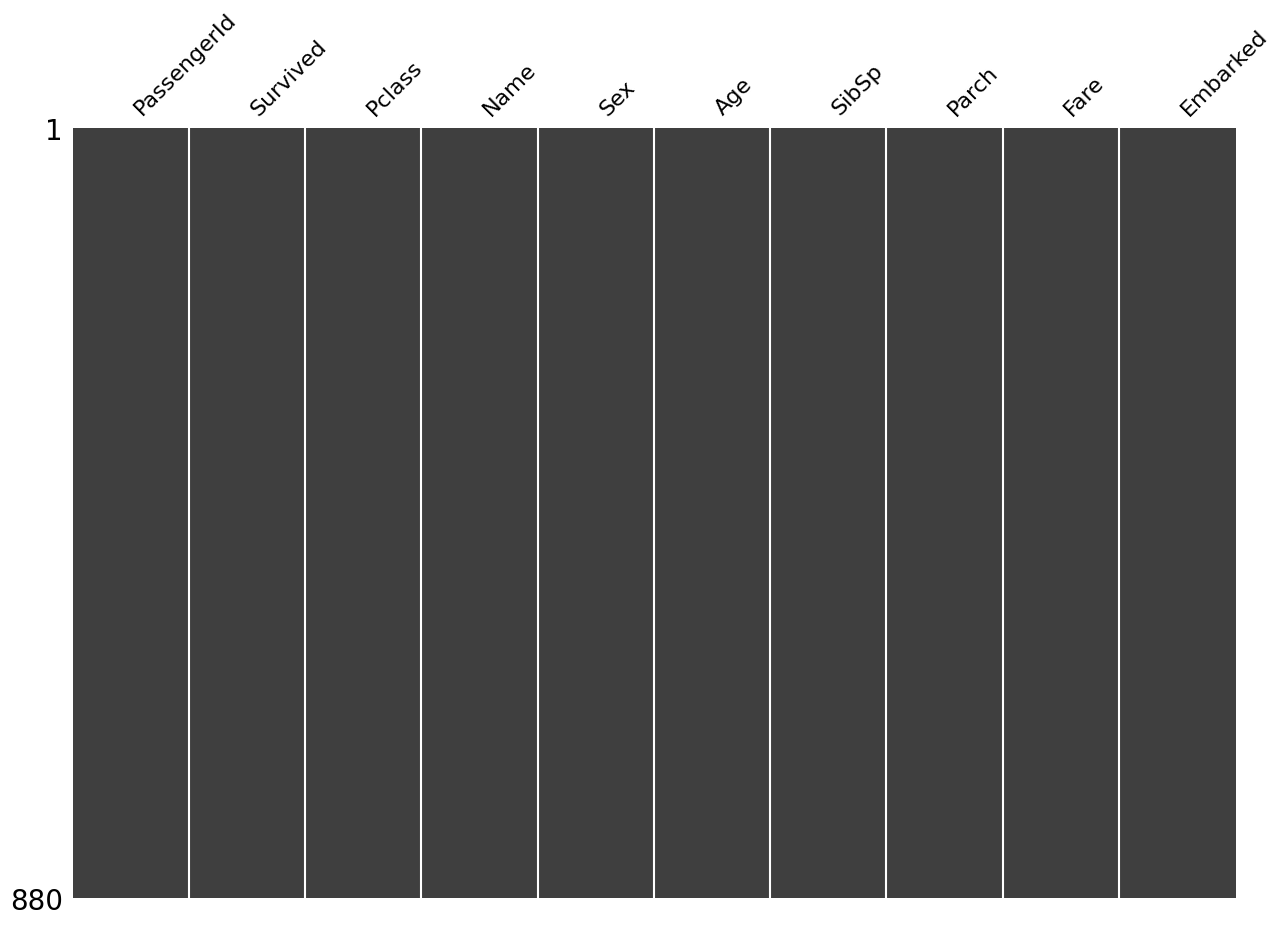

In [18]:
# After replacing
print(dataset.isnull().sum())
msno.matrix(dataset,figsize=(15,10),sparkline=False,p=0)

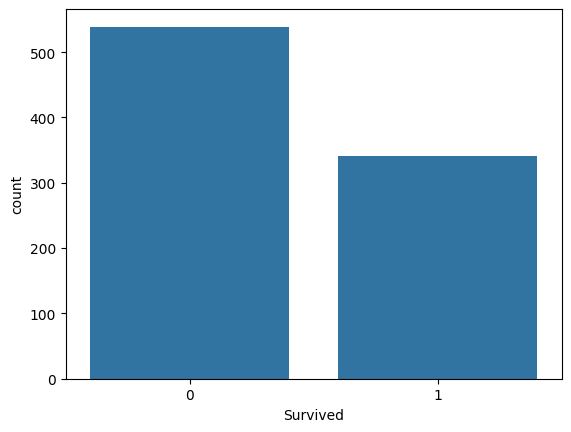

In [19]:
sns.countplot(x='Survived', data=dataset)
plt.show()

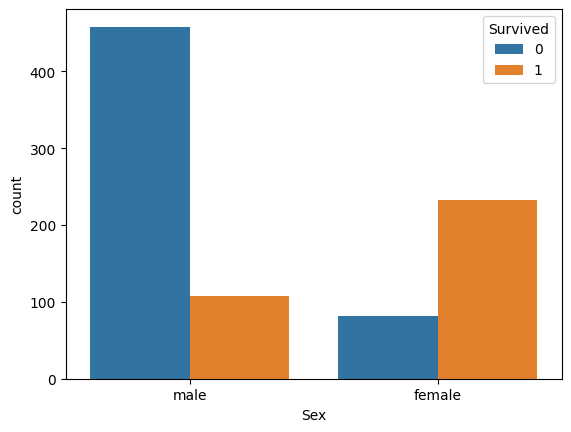

In [20]:
sns.countplot(x='Sex', hue='Survived', data=dataset)
plt.show()

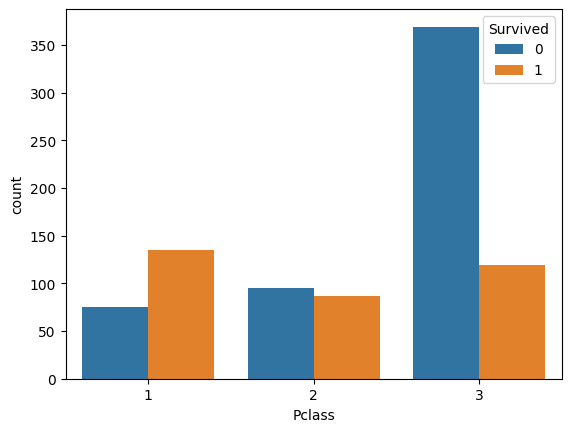

In [21]:
sns.countplot(x='Pclass', hue='Survived', data=dataset)
plt.show()

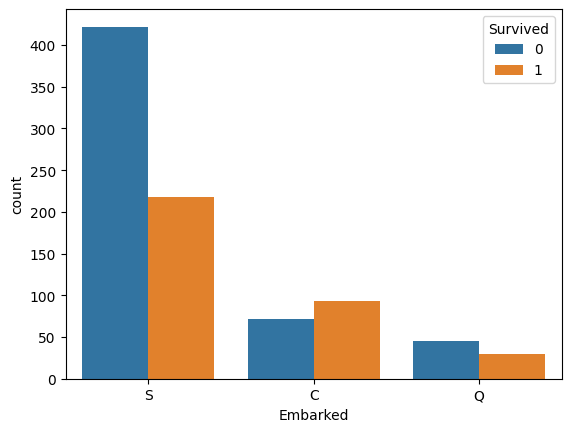

In [22]:
sns.countplot(x='Embarked', hue='Survived', data=dataset)
plt.show()

In [25]:
# Converting categorical to numerical
dataset.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

MODEL BUILDING AND EVALUATION

In [26]:
from sklearn.model_selection import train_test_split
X=dataset.iloc[:, 2:12]
Y=dataset.iloc[:, 1:2]

In [27]:
X = X.drop(['Name'], axis=1)
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.072077      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[880 rows x 7 columns]


In [28]:
X_train, X_test, Y_train,Y_test=train_test_split(X,Y,random_state=0,train_size=0.70)

In [29]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
122,2,0,32.500000,1,0,30.0708,1
12,3,0,20.000000,0,0,8.0500,0
161,2,1,40.000000,0,0,15.7500,0
131,3,0,20.000000,0,0,7.0500,0
448,3,1,5.000000,2,1,19.2583,1
...,...,...,...,...,...,...,...
845,3,0,42.000000,0,0,7.5500,0
196,3,0,29.072077,0,0,7.7500,2
637,2,0,31.000000,1,1,26.2500,0
566,3,0,19.000000,0,0,7.8958,0


In [30]:
Y_train

,Survived
122,0
12,0
161,1
131,0
448,1
...,...
845,0
196,0
637,0
566,0


In [35]:
# Training and testing the model
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)

C:\Users\javee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
# Model evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
cm = confusion_matrix(Y_test, Y_pred)
ac = accuracy_score(Y_test,Y_pred)
rs = recall_score(Y_test, Y_pred)
ps = precision_score(Y_test,Y_pred)
f1 = f1_score(Y_test, Y_pred, average="macro")
print("Accuracy on Test data:",ac)
print("Precision on Test data:",ps)
print("Recall on Test data:",rs)
print("F1 score on Test data:",f1)

Accuracy on Test data: 0.7878787878787878
Precision on Test data: 0.7473684210526316
Recall on Test data: 0.6893203883495146
F1 score on Test data: 0.7737373737373737


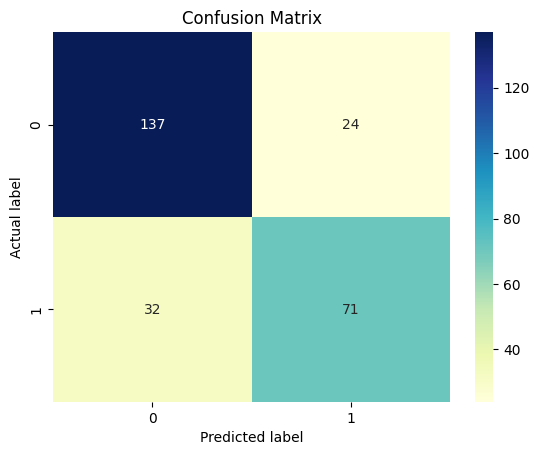

In [39]:
class_names = [0, 1]
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.xticks(np.arange(len(class_names)) + 0.5, class_names)
plt.yticks(np.arange(len(class_names)) + 0.5, class_names)
plt.show()